<a href="https://colab.research.google.com/github/MrsIgnis/IIS/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**22 вариант**

# **Классификация с использованием нейронной сети**

Требуется:
 1. Выполнить предобработку данных согласно примеру:
 - разделение входных и выходных переменных;
 - нормирование входных данных;
 - кодирование выходных данных;
 - разбиение данных на обучающий и тестовый наборы.
 2. С помощью Tensorflow или пакета Neuralnet в R построить нейронную сеть и обучить ее на обучающем наборе;
 3. Вывести:
 - метрики процесса обучения нейронной сети (для Tensorflow);
 - результаты проверки на тестовой выборке (количество верно
классифицированных).

**I. Предобработка данных**

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = {"X":[ 0.61640473, 1.15105065, 1.08250887, 1.79122928, 0.87039848, 0.26382425, 0.84614641, 1.55592257, 1.22496438,-1.4641585 , 1.73408666, 0.20890011, 3.46656717, 1.13871152, 1.78350193, 1.15869532, 0.86816178,-0.46619501, 1.7147475 , 0.95349613, 2.03330018, 0.94899542, 0.96809256, 1.66897401, 0.81688905, 0.37805417, 8.2117662 , 7.44274157, 8.26936762, 7.05845212, 8.2401766 , 8.39251953, 7.9017118 , 8.47140668, 8.07421192, 7.62078121, 7.8695178 , 8.27561367, 7.15181535, 8.09326882, 8.39302119, 8.72889083, 8.14491844, 7.48622333, 7.94410244, 8.38488149, 7.4691065 , 8.10428134, 8.41319561, 8.58870922, 8.61526439, 7.21183975,12.93260704,13.93222732, 13.19626297,13.01758343,13.00275053,12.83840356,12.05953037,12.42767898, 13.35518722,12.90938394,12.35846874,12.24289816,12.40814792,13.04251117, 13.17897758,13.9911899 ,12.65809604,12.94499417,13.24743098,12.36464381, 12.86587426,13.73274265,12.95700056,13.27748815,13.77145072,11.83077875],
"Y":[ 5.61395349, 5.66676063, 5.65913736, 5.36826837, 6.21026526, 5.62081978, 5.70366974, 6.17307621, 5.76266525, 6.83890642, 6.05998745, 6.28158697, 6.59867941, 5.75451212, 6.41322846, 5.03975477, 5.16188088, 5.34944896, 5.85256832, 5.86476286, 4.80131921, 6.35037561, 5.57281315, 5.84366496, 5.6181988 , 5.04028016, 1.93756052, 1.96886584, 2.09393026, 1.82263193, 1.65022885, 2.43264147, 2.32922951, 1.55240193, 1.29377604, 2.52241949, 1.93214599, 1.84085824, 1.92443497, 0.87473477, 2.41850125, 2.69700006, 1.51019455, 1.56846952, 1.97841763, 1.88622786, 2.08679634, 1.59212411, 1.95891633, 1.72761996, 3.50018495, 2.34147545, 8.93273696, 9.57230339, 9.87868184, 9.2897729 , 7.73107786, 7.20577279, 9.86735616,12.92067662, 11.41341307, 8.46875662,12.14883277, 8.84421437, 7.30178167, 9.97884107, 12.01338794,11.21431915,10.3307007 , 8.91373949,10.6409741 , 9.11299278, 5.71617856,11.09254073, 8.6904354 ,10.40730987, 8.86833783, 8.0552307 ],
"class":['Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3']
}

In [24]:
X = np.c_[data["X"], data["Y"]]
Y_raw = data["class"]

xmin = np.min(X)
Xnorm = (X - xmin) / (np.max(X) - xmin)

ohe = OneHotEncoder(sparse_output=False)
Yenc = ohe.fit_transform(np.array(Y_raw).reshape(-1, 1))

In [8]:
print(f"Форма тензора X (нормированные входы): {Xnorm.shape}")
print(f"Форма тензора Y (One-Hot кодирование): {Yenc.shape}")
print(f"Обнаруженные классы: {ohe.categories_[0]}")

Форма тензора X (нормированные входы): (78, 2)
Форма тензора Y (One-Hot кодирование): (78, 3)
Обнаруженные классы: ['Class1' 'Class2' 'Class3']


In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(Xnorm, Yenc, test_size=0.25, random_state=42)

In [25]:
print(f"Форма тензора xTrain: {xTrain.shape}")
print(f"Форма тензора yTrain: {yTrain.shape}")
print(f"Форма тензора xTest: {xTest.shape}")
print(f"Форма тензора yTest: {yTest.shape}")

Форма тензора xTrain: (58, 2)
Форма тензора yTrain: (58, 3)
Форма тензора xTest: (20, 2)
Форма тензора yTest: (20, 3)


**II. Построение и обучение нейронной сети**

In [12]:
input_dim = xTrain.shape[1]
output_dim = yTrain.shape[1]

In [26]:
model = Sequential([
    Dense(units=4, activation="relu", input_shape=(input_dim,)),
    Dense(units=4, activation="relu"),
    Dense(units=output_dim, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47 (188.00 B)

 Trainable params: 47 (188.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
EPOCHS = 100
BATCH_SIZE = 10

hist = model.fit(
    x=xTrain,
    y=yTrain,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=0
)

print(f"\nОбучение завершено за {EPOCHS} эпох.")


Обучение завершено за 100 эпох.


**III. Вывод результатов**

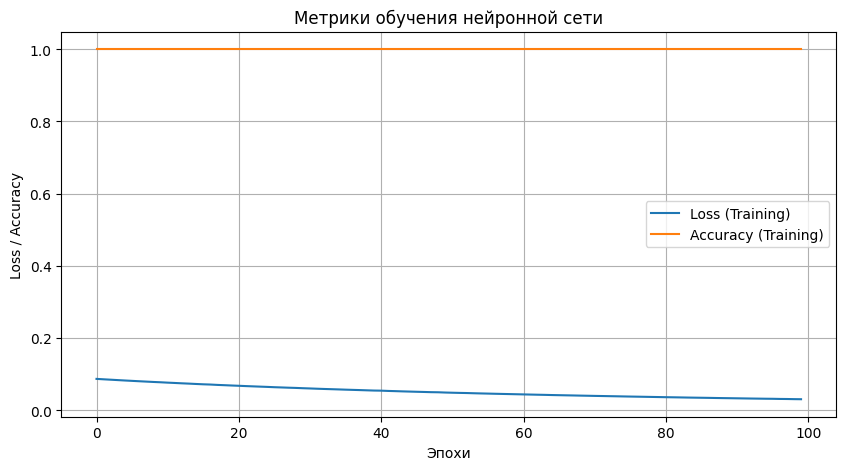

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Loss (Training)")
plt.plot(hist.history["categorical_accuracy"], label="Accuracy (Training)")
plt.title("Метрики обучения нейронной сети")
plt.ylabel("Loss / Accuracy")
plt.xlabel("Эпохи")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
loss, accuracy = model.evaluate(xTest, yTest, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Categorical Accuracy (Встроенная метрика): {accuracy:.4f}")

Loss: 1.2271
Categorical Accuracy (Встроенная метрика): 0.4000


In [22]:
yPred_logits = model.predict(xTest, verbose=0)

yPred_indices = np.argmax(yPred_logits, axis=1)
yActual_indices = np.argmax(yTest, axis=1)

match = np.sum(yPred_indices == yActual_indices)

In [28]:
class_names = ohe.categories_[0]

for i in range(len(xTest)):
    maxLogit = yPred_indices[i]
    yAct = yActual_indices[i]

    predicted_class = class_names[maxLogit]
    actual_class = class_names[yAct]

    print(f"Распознали как группу {predicted_class} | На самом деле: {actual_class}. {'(Верно)' if predicted_class == actual_class else '(Ошибка)'}")


print(f"\nВерно распознано: {match} из {len(xTest)}")
print(f"Процент точности: {match / len(xTest) * 100:.2f}%")

Распознали как группу Class2 | На самом деле: Class2. (Верно)
Распознали как группу Class1 | На самом деле: Class1. (Верно)
Распознали как группу Class2 | На самом деле: Class2. (Верно)
Распознали как группу Class1 | На самом деле: Class1. (Верно)
Распознали как группу Class1 | На самом деле: Class1. (Верно)
Распознали как группу Class3 | На самом деле: Class3. (Верно)
Распознали как группу Class2 | На самом деле: Class2. (Верно)
Распознали как группу Class1 | На самом деле: Class1. (Верно)
Распознали как группу Class2 | На самом деле: Class2. (Верно)
Распознали как группу Class3 | На самом деле: Class3. (Верно)
Распознали как группу Class3 | На самом деле: Class3. (Верно)
Распознали как группу Class1 | На самом деле: Class1. (Верно)
Распознали как группу Class2 | На самом деле: Class3. (Ошибка)
Распознали как группу Class3 | На самом деле: Class3. (Верно)
Распознали как группу Class1 | На самом деле: Class1. (Верно)
Распознали как группу Class2 | На самом деле: Class2. (Верно)
Распозн